**Set Up Variables**


In [5]:
def optimal_solution_centralized(r,c,s):
    profits = [profit_centralized(Q,r,c,s) for Q in range(40,166)]
    q_list = [q for q in range(40,166)]
    max_profit = max(profits)
    optimal_Q = q_list[profits.index(max_profit)]
    return optimal_Q, max_profit

optimal_solution_centralized(50,10,5)

NameError: name 'demand_value' is not defined

In [3]:
from matplotlib import pyplot as plt
profits = [profit_centralized(q,50,10,5) for q in range(40,166)]
plt.plot([q for q in range(40,166)], profits)
plt.show()

NameError: name 'demand_value' is not defined

Optimal solution Centralized function


In [ ]:
# the supplier varies w from c to r and chooses the w maximizing her profit
wholesale_price_list = [w for w in range(10,51,1)]
profits = [profit_supplier(w,50,10,5) for w in wholesale_price_list]

plt.plot(wholesale_price_list,profits)
plt.show()

(140, 3842.3000000000006)

In [2]:
# profit of the centralized case
# profit = r*Min(Q,D) + sMax(0,Q-D) - cQ

def profit_centralized(Q,r,c,s):
    profit = 0
    for d in demand_value:
        index = demand_value.index(d)
        profit = profit + (r * min(d,Q) + s * max(0,Q-d) - c * Q)*demand_proba[index]
    return profit

profit_centralized(Q=150,r=50,c=10,s=5)

NameError: name 'demand_value' is not defined

**Decentralized case**

In [ ]:
# Modify the buyback contract to focus on win-win for retailer and supplier and find the optimal quantity
def optimal_buyback_contract_winwin(r, c, s):
    centralized_profit = optimal_solution_centralized(r, c, s)[1]

    # Get decentralized solution as a baseline
    optimal_w_decentralized, _, Q_decentralized, profit_retailer_dec, total_profit_dec = optimal_solution_decentralized(r, c, s)

    best_w = 0
    best_b = 0
    best_Q = 0
    best_combination_profit = float('-inf')
    best_retailer_profit = 0
    best_supplier_profit = 0
    optimal_w_b_pairs = []

    for w in range(c, r + 1):  # Wholesale price between c and r
        for b in range(0, w + 1):  # Buyback price between 0 and w
            for Q in range(40, 166):  # Test different quantities
                retailer_profit = profit_retailer_buyback(Q, r, w, s, b)
                supplier_profit = profit_supplier_buyback(Q, w, c, b)
                total_profit = retailer_profit + supplier_profit

                # Check if both retailer and supplier have higher profit than decentralized case
                if retailer_profit > profit_retailer_dec and supplier_profit > profit_supplier_decentralized(Q_decentralized, w, c):
                    optimal_w_b_pairs.append((w, b, Q, retailer_profit, supplier_profit, total_profit))
                    if total_profit > best_combination_profit:
                        best_combination_profit = total_profit
                        best_w, best_b = w, b
                        best_Q = Q
                        best_retailer_profit = retailer_profit
                        best_supplier_profit = supplier_profit

    return optimal_w_b_pairs, best_w, best_b, best_Q, best_combination_profit, best_retailer_profit, best_supplier_profit

# Run the function and display the results
optimal_w_b_pairs, best_w, best_b, best_Q, best_combination_profit, best_retailer_profit, best_supplier_profit = optimal_buyback_contract_winwin(r=50, c=10, s=5)

# Show all the optimal (w, b, Q) pairs that result in win-win
for pair in optimal_w_b_pairs:
    print(f"Wholesale Price: {pair[0]}, Buyback Price: {pair[1]}, Quantity: {pair[2]}, Retailer Profit: {pair[3]:.2f}, Supplier Profit: {pair[4]:.2f}, Total Profit: {pair[5]:.2f}")

# Show the best combination including retailer and supplier profits and optimal quantity
print(f"\nBest Wholesale Price: {best_w}, Best Buyback Price: {best_b}, Optimal Quantity: {best_Q}, Retailer Profit: {best_retailer_profit:.2f}, Supplier Profit: {best_supplier_profit:.2f}, Total Profit: {best_combination_profit:.2f}")

1575

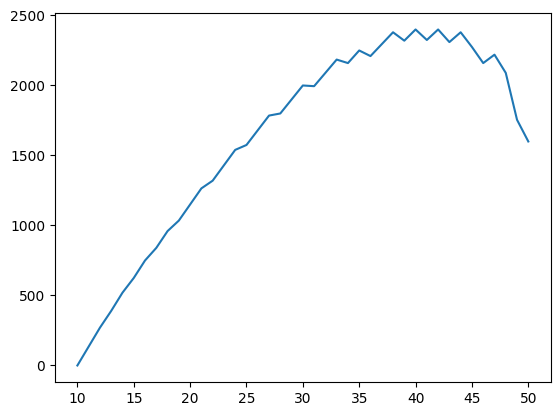

In [ ]:
# Modify the buyback contract to focus on win-win for retailer and supplier
def optimal_buyback_contract_winwin(r, c, s):
    centralized_profit = optimal_solution_centralized(r, c, s)[1]
    optimal_Q_centralized = optimal_solution_centralized(r, c, s)[0]

    # Get decentralized solution as a baseline
    optimal_w_decentralized, _, Q_decentralized, profit_retailer_dec, total_profit_dec = optimal_solution_decentralized(r, c, s)

    best_w = 0
    best_b = 0
    best_combination_profit = float('-inf')
    best_retailer_profit = 0
    best_supplier_profit = 0
    optimal_w_b_pairs = []

    for w in range(c, r + 1):  # Wholesale price between c and r
        for b in range(0, w + 1):  # Buyback price between 0 and w
            Q = optimal_Q_centralized  # We use the centralized quantity for fair comparison
            retailer_profit = profit_retailer_buyback(Q, r, w, s, b)
            supplier_profit = profit_supplier_buyback(Q, w, c, b)
            total_profit = retailer_profit + supplier_profit

            # Check if both retailer and supplier have higher profit than decentralized case
            if retailer_profit > profit_retailer_dec and supplier_profit > profit_supplier_decentralized(Q_decentralized, w, c):
                optimal_w_b_pairs.append((w, b, retailer_profit, supplier_profit, total_profit))
                if total_profit > best_combination_profit:
                    best_combination_profit = total_profit
                    best_w, best_b = w, b
                    best_retailer_profit = retailer_profit
                    best_supplier_profit = supplier_profit

    return optimal_w_b_pairs, best_w, best_b, best_combination_profit, best_retailer_profit, best_supplier_profit

# Run the function and display the results
optimal_w_b_pairs, best_w, best_b, best_combination_profit, best_retailer_profit, best_supplier_profit = optimal_buyback_contract_winwin(r=50, c=10, s=5)

# Show all the optimal (w, b) pairs that result in win-win
for pair in optimal_w_b_pairs:
    print(f"Wholesale Price: {pair[0]}, Buyback Price: {pair[1]}, Retailer Profit: {pair[2]:.2f}, Supplier Profit: {pair[3]:.2f}, Total Profit: {pair[4]:.2f}")

# Show the best combination including retailer and supplier profits
print(f"\nBest Wholesale Price: {best_w}, Best Buyback Price: {best_b}, Retailer Profit: {best_retailer_profit:.2f}, Supplier Profit: {best_supplier_profit:.2f}, Total Profit: {best_combination_profit:.2f}")

**Optimal Solution Decentralized**

In [ ]:
def optimal_solution_decentralized(r, c, s):
    """
    Calculates the optimal wholesale price (w) that maximizes the supplier's profit
    in the decentralized case.

    Parameters:
    - r: Retail price per unit
    - c: Supplier's cost per unit
    - s: Salvage value per unit

    Returns:
    - optimal_w: Optimal wholesale price
    - max_profit: Supplier's maximum profit
    - optimal_Q: Retailer's optimal order quantity
    - profit_retailer: Retailer's profit
    - total_profit: Total supply chain profit
    """

    # Step 1: Initial coarse search over integer wholesale prices from c to r
    wholesale_prices = list(range(c, r + 1))
    supplier_profits = []

    for w in wholesale_prices:
        profit = profit_supplier(w,r,c,s)
        supplier_profits.append(profit)

    max_profit = max(supplier_profits)
    optimal_w_index = supplier_profits.index(max_profit)
    optimal_w = wholesale_prices[optimal_w_index]

    # Step 2: Refined search around optimal_w to cent accuracy
    # Define refined wholesale price range with cent accuracy
    w_min = max(c, optimal_w - 1)
    w_max = min(r, optimal_w + 1)
    wholesale_prices_fine = [w / 100 for w in range(int(w_min * 100), int(w_max * 100 + 1))]

    supplier_profits_fine = []

    for w in wholesale_prices_fine:
        # Calculate supplier's profit for each refined wholesale price
        profit = profit_supplier(w, r, c, s)
        supplier_profits_fine.append(profit)

    # Find the wholesale price that maximizes supplier profit in refined search
    max_profit = max(supplier_profits_fine)
    optimal_w_index = supplier_profits_fine.index(max_profit)
    optimal_w = wholesale_prices_fine[optimal_w_index]

    # Obtain retailer's optimal order quantity and profit at optimal wholesale price
    optimal_Q, profit_retailer = optimal_solution_centralized(r, optimal_w, s)

    # Calculate total supply chain profit
    total_profit = profit_retailer + max_profit

    # Return the results
    return optimal_w, max_profit, optimal_Q, profit_retailer, total_profit

# Example usage with given parameters
r = 50   # Retail price
c = 10   # Supplier's cost
s = 5    # Salvage value

# Call the function and print the results
optimal_w, max_profit, optimal_Q, profit_retailer, total_profit = optimal_solution_decentralized(r, c, s)

print(f"Optimal Wholesale Price (w): {optimal_w:.2f}")
print(f"Supplier's Maximum Profit: {max_profit:.2f}")
print(f"Retailer's Optimal Order Quantity (Q): {optimal_Q}")
print(f"Retailer's Profit: {profit_retailer:.2f}")
print(f"Total Supply Chain Profit: {total_profit:.2f}")


Optimal Wholesale Price (w): 40.45
Supplier's Maximum Profit: 2436.00
Retailer's Optimal Order Quantity (Q): 80
Retailer's Profit: 596.60
Total Supply Chain Profit: 3032.60


In [ ]:
optimal_solution_decentralized(r=50,c=10,s=5)

(40.45, 2436.0, 80, 596.6, 3032.6)

This solution does not inclue the buy back.

**Profit Supplier Formula**

In [ ]:
def profit_supplier_buyback(w,r,c,s,b):
    Q = optimal_solution_centralized(r,w,s)[0]
    profit = (w-c) * Q
    for d in demand_value:
      index = demand_value.index(d)
      profit = profit + ((w-c))*Q-b* max(0, Q - d) * demand_proba[index]
    return profit




**Profit Retailer formula**


In [ ]:

def profit_retailer_buyback(Q,r,w,b):
  profit=0
  for d in demand_value:
    index = demand_value.index(d)
    profit = profit + (r*min(Q,d)+ b * max(0,Q-d)-w*Q)*demand_proba[index]
    return profit

Optimal solution Decentralized

In [ ]:
# Define the demand probabilities and values
def get_demand_data():
    # Demand probabilities
    part1 = [n / 1000 for n in range(9, 70, 5)]
    part2 = [n / 1000 for n in range(68, 10, -5)]
    part3 = [0.007]
    demand_proba = part1 + part2 + part3

    # Demand values
    demand_value = [n for n in range(40, 170, 5)]
    return demand_value, demand_proba

# Get demand data
demand_value, demand_proba = get_demand_data()

# Function to calculate retailer's expected profit under a buy-back contract
def profit_retailer_buyback(Q, r, w, b):
    profit = 0
    for d, p in zip(demand_value, demand_proba):
        profit += (r * min(Q, d) + b * max(0, Q - d) - w * Q) * p
    return profit

# Function to find the retailer's optimal order quantity under buy-back contract
def find_optimal_retailer_Q_buyback(r, w, b):
    Q_values = range(40, 170, 5)  # Possible order quantities
    profits = []

    for Q in Q_values:
        profit = profit_retailer_buyback(Q, r, w, b)
        profits.append(profit)

    max_profit = max(profits)
    optimal_Q = Q_values[profits.index(max_profit)]
    return optimal_Q, max_profit

# Function to calculate supplier's expected profit under a buy-back contract
def profit_supplier_buyback(w, c, b, Q):
    profit = (w - c) * Q
    expected_unsold_units = 0
    for d, p in zip(demand_value, demand_proba):
        unsold_units = max(0, Q - d)
        expected_unsold_units += unsold_units * p
    profit -= b * expected_unsold_units
    return profit

# Function to find the optimal (W, B) pair in the context of a win-win contract
def find_optimal_WB_winwin(r, c):
    """
    Finds the optimal wholesale price (W) and buy-back price (B) that maximize
    the total supply chain profit in a win-win contract.

    Parameters:
    - r: Retail price per unit
    - c: Supplier's cost per unit

    Returns:
    - optimal_W: Optimal wholesale price
    - optimal_B: Optimal buy-back price
    - max_total_profit: Maximum total supply chain profit
    - supplier_profit: Supplier's profit at optimal (W, B)
    - retailer_profit: Retailer's profit at optimal (W, B)
    - optimal_Q: Retailer's optimal order quantity at optimal (W, B)
    """
    # Initialize variables to store optimal results
    max_total_profit = float('-inf')
    optimal_W = None
    optimal_B = None
    supplier_profit_optimal = None
    retailer_profit_optimal = None
    optimal_Q = None

    # Define ranges for W and B
    W_values = [w / 10 for w in range(int(c * 10), int(r * 10) + 1)]  # From c to r in increments of 0.1
    B_values = [b / 10 for b in range(0, int(r * 10) + 1)]  # From 0 to r in increments of 0.1

    # Get the profits in the decentralized case without coordination for comparison
    # Assuming the retailer and supplier profits without buy-back contract are:
    # Use the functions without buy-back to compute these (you may need to define them if not already)
    # For simplicity, let's assume some baseline profits
    # Alternatively, you can compute the decentralized profits as in previous steps

    # For the purpose of this code, we assume baseline profits
    # You should replace these with actual calculations if necessary
    baseline_supplier_profit = 0
    baseline_retailer_profit = 0

    # Loop over possible W and B values
    for w in W_values:
        for b in B_values:
            if b >= w:
                continue  # Buy-back price cannot exceed wholesale price
            # Retailer determines optimal Q for given w and b
            Q, retailer_profit = find_optimal_retailer_Q_buyback(r, w, b)
            # Supplier calculates profit with buy-back
            supplier_profit = profit_supplier_buyback(w, c, b, Q)
            # Total supply chain profit
            total_profit = supplier_profit + retailer_profit

            # Check for win-win condition
            if supplier_profit > baseline_supplier_profit and retailer_profit > baseline_retailer_profit:
                # Update optimal values if total profit is higher
                if total_profit > max_total_profit:
                    max_total_profit = total_profit
                    optimal_W = w
                    optimal_B = b
                    supplier_profit_optimal = supplier_profit
                    retailer_profit_optimal = retailer_profit
                    optimal_Q = Q

    # Return the results
    return optimal_W, optimal_B, max_total_profit, supplier_profit_optimal, retailer_profit_optimal, optimal_Q

# Example usage with given parameters
r = 50   # Retail price
c = 10   # Supplier's cost

# Call the function and print the results
optimal_W, optimal_B, max_total_profit, supplier_profit, retailer_profit, optimal_Q = find_optimal_WB_winwin(r, c)

print(f"Optimal Wholesale Price (W): {optimal_W:.2f}")
print(f"Optimal Buy-Back Price (B): {optimal_B:.2f}")
print(f"Supplier's Profit: {supplier_profit:.2f}")
print(f"Retailer's Profit: {retailer_profit:.2f}")
print(f"Total Supply Chain Profit: {max_total_profit:.2f}")
print(f"Retailer's Optimal Order Quantity (Q): {optimal_Q}")


Optimal Wholesale Price (W): 17.50
Optimal Buy-Back Price (B): 9.50
Supplier's Profit: 685.54
Retailer's Profit: 2990.97
Total Supply Chain Profit: 3676.50
Retailer's Optimal Order Quantity (Q): 130


this solution is good but the profit is not the best if i modify Q incremently 1 by 1. I can find A Q value getting closer and closer to Q=140

In [ ]:
import numpy as np

# Define the demand probabilities and values
def get_demand_data():
    # Demand probabilities
    part1 = [n / 1000 for n in range(9, 70, 5)]  # Probabilities from 0.009 to 0.069
    part2 = [n / 1000 for n in range(68, 10, -5)]  # Probabilities from 0.068 to 0.011
    part3 = [0.007]
    demand_proba = part1 + part2 + part3  # Total probabilities
    # Demand values
    demand_value = [n for n in range(40, 170, 5)]  # Demands from 40 to 165
    return demand_value, demand_proba

# Get demand data
demand_value, demand_proba = get_demand_data()

# Function to calculate retailer's expected profit under a buy-back contract
def profit_retailer_buyback(Q, r, w, s, b):
    profit = 0
    for d, p in zip(demand_value, demand_proba):
        revenue = r * min(Q, d) + b * max(0, Q - d) - w * Q - s * max(0, d - Q)
        profit += revenue * p
    return profit

# Function to calculate supplier's expected profit under a buy-back contract
def profit_supplier_buyback(Q, w, c, b):
    profit = (w - c) * Q
    expected_buybacks = 0
    for d, p in zip(demand_value, demand_proba):
        unsold_units = max(0, Q - d)
        expected_buybacks += unsold_units * p
    profit -= b * expected_buybacks
    return profit

# Function to calculate supplier's profit in the decentralized case without buy-back
def profit_supplier_decentralized(Q, w, c):
    profit = (w - c) * Q
    return profit

# Function to calculate retailer's profit in the decentralized case without buy-back
def profit_retailer_decentralized(Q, r, w, s):
    profit = 0
    for d, p in zip(demand_value, demand_proba):
        revenue = r * min(Q, d) + s * max(0, Q - d) - w * Q
        profit += revenue * p
    return profit

# Function to find the optimal buy-back contract for a win-win situation
def optimal_buyback_contract_winwin(r, c, s):
    """
    Finds the optimal wholesale price (w) and buy-back price (b) that result
    in a win-win situation in the decentralized case.

    Parameters:
    - r: Retail price per unit
    - c: Supplier's cost per unit
    - s: Salvage value per unit

    Returns:
    - optimal_w_b_pairs: List of tuples containing optimal (w, b) pairs and associated profits
    - best_w: Best wholesale price
    - best_b: Best buy-back price
    - best_Q: Order quantity at best (w, b)
    - best_combination_profit: Total profit at best (w, b)
    - best_retailer_profit: Retailer's profit at best (w, b)
    - best_supplier_profit: Supplier's profit at best (w, b)
    """
    # Get decentralized solution as a baseline
    Q_values = range(40, 141)  # Assuming Q ranges from 40 to 140
    retailer_profits_dec = []
    supplier_profits_dec = []
    total_profits_dec = []

    # Assume a reasonable wholesale price in the decentralized case
    w0 = c + (r - c) / 2  # Midpoint between c and r
    for Q in Q_values:
        retailer_profit = profit_retailer_decentralized(Q, r, w0, s)
        supplier_profit = profit_supplier_decentralized(Q, w0, c)
        total_profit = retailer_profit + supplier_profit
        retailer_profits_dec.append(retailer_profit)
        supplier_profits_dec.append(supplier_profit)
        total_profits_dec.append(total_profit)

    # Find the optimal Q in the decentralized case
    max_total_profit_dec = max(total_profits_dec)
    optimal_Q_dec = Q_values[total_profits_dec.index(max_total_profit_dec)]
    profit_retailer_dec = retailer_profits_dec[total_profits_dec.index(max_total_profit_dec)]
    profit_supplier_dec = supplier_profits_dec[total_profits_dec.index(max_total_profit_dec)]

    print(f"Decentralized case:")
    print(f"Wholesale Price (w0): {w0:.2f}")
    print(f"Retailer's Optimal Order Quantity (Q0): {optimal_Q_dec}")
    print(f"Supplier's Profit: {profit_supplier_dec:.2f}")
    print(f"Retailer's Profit: {profit_retailer_dec:.2f}")
    print(f"Total Supply Chain Profit: {max_total_profit_dec:.2f}\n")

    best_w = 0
    best_b = 0
    best_combination_profit = float('-inf')
    best_retailer_profit = 0
    best_supplier_profit = 0
    best_Q = 0
    optimal_w_b_pairs = []

    # Loop over possible W and B values to find win-win contracts
    for w in range(int(c), int(r) + 1):  # Wholesale price between c and r
        for b in range(0, w + 1):  # Buy-back price between 0 and w
            # Condition (S + B) < R
            if (s + b) >= r:
                continue
            for Q in Q_values:
                retailer_profit = profit_retailer_buyback(Q, r, w, s, b)
                supplier_profit = profit_supplier_buyback(Q, w, c, b)
                total_profit = retailer_profit + supplier_profit

                # Check if both retailer and supplier have higher profit than decentralized case
                if (retailer_profit > profit_retailer_dec and
                    supplier_profit > profit_supplier_dec):
                    optimal_w_b_pairs.append((w, b, Q, retailer_profit, supplier_profit, total_profit))
                    if total_profit > best_combination_profit:
                        best_combination_profit = total_profit
                        best_w, best_b = w, b
                        best_retailer_profit = retailer_profit
                        best_supplier_profit = supplier_profit
                        best_Q = Q

    # Display all optimal (w, b) pairs that result in win-win
    if optimal_w_b_pairs:
        print("Optimal (W, B) pairs resulting in a win-win situation:")
        for pair in optimal_w_b_pairs:
            print(f"Wholesale Price: {pair[0]}, Buy-back Price: {pair[1]}, Order Quantity: {pair[2]}, "
                  f"Retailer Profit: {pair[3]:.2f}, Supplier Profit: {pair[4]:.2f}, Total Profit: {pair[5]:.2f}")
    else:
        print("No win-win buy-back contracts found satisfying the conditions.")

    return optimal_w_b_pairs, best_w, best_b, best_Q, best_combination_profit, best_retailer_profit, best_supplier_profit

# Run the function and display the results
optimal_w_b_pairs, best_w, best_b, best_Q, best_combination_profit, best_retailer_profit, best_supplier_profit = optimal_buyback_contract_winwin(r=50, c=10, s=5)

# Show all the optimal (w, b) pairs that result in win-win
print("\nOptimal (W, B) pairs that result in a win-win situation:")
for pair in optimal_w_b_pairs:
    print(f"Wholesale Price: {pair[0]}, Buy-back Price: {pair[1]}, Order Quantity: {pair[2]}, "
          f"Retailer Profit: {pair[3]:.2f}, Supplier Profit: {pair[4]:.2f}, Total Profit: {pair[5]:.2f}")

# Display the best values including retailer and supplier profits
print(f"\nBest Wholesale Price: {best_w}, Best Buy-back Price: {best_b}, "
      f"Order Quantity: {best_Q}, Retailer Profit: {best_retailer_profit:.2f}, "
      f"Supplier Profit: {best_supplier_profit:.2f}, Total Profit: {best_combination_profit:.2f}")


Decentralized case:
Wholesale Price (w0): 30.00
Retailer's Optimal Order Quantity (Q0): 140
Supplier's Profit: 2800.00
Retailer's Profit: 1042.30
Total Supply Chain Profit: 3842.30

No win-win buy-back contracts found satisfying the conditions.

Optimal (W, B) pairs that result in a win-win situation:

Best Wholesale Price: 0, Best Buy-back Price: 0, Order Quantity: 0, Retailer Profit: 0.00, Supplier Profit: 0.00, Total Profit: -inf
